In [1]:
%load_ext autoreload
%autoreload 2

# imports

In [2]:
from tools import P_forest_small, R_forest_small, P_forest_large, R_forest_large, \
                P_lake_small, R_lake_small, lake_small, \
                P_lake_large, R_lake_large, lake_large, \
                eval_policy_forest, eval_policy_lake, \
                tune_hyper, plot_hyper_curve, convergence_plot, visualize_lake, \
                visualize_forest, time_effect_plot
from hiive.mdptoolbox.mdp import ValueIteration 
import time
import pickle

# forest

## small

### tune hyper

best params are {'epsilon': 5, 'gamma': 0.7, 'max_iter': 100}


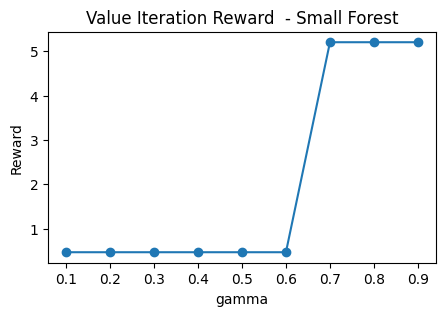

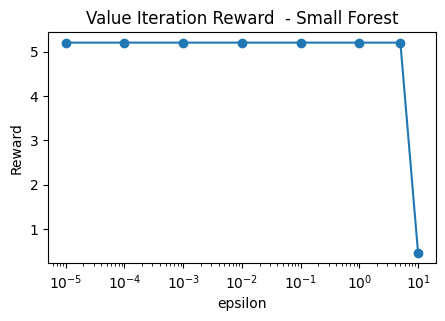

CPU times: user 25.7 s, sys: 107 ms, total: 25.8 s
Wall time: 26.7 s


In [3]:
%%time
# default: initial_value=0
param_grid = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'epsilon': [1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 5, 10],
    'max_iter': [100]
}
problem = 'forest'
best_params_forest_small, result_forest_small = tune_hyper(param_grid, ValueIteration, P_forest_small, R_forest_small, problem=problem, 
                         episode=1000, max_step=40, verbose=False)
print(f'best params are {best_params_forest_small}')
model_type = 'Value Iteration'
data_name = 'Small Forest'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_forest_small, result=result_forest_small, 
                 model_type=model_type, data_name=data_name)
hyper = 'epsilon'
plot_hyper_curve(hyper, params=best_params_forest_small, result=result_forest_small, 
                 model_type=model_type, data_name=data_name, log_x=True)

In [4]:
result_forest_small

,epsilon,gamma,max_iter,reward,policy,iteration
0,0.00001,0.1,100,0.4666,"(0, 1, 1, 1, 0)",5
1,0.00001,0.2,100,0.4666,"(0, 1, 1, 0, 0)",8
2,0.00001,0.3,100,0.4666,"(0, 1, 1, 0, 0)",10
3,0.00001,0.4,100,0.4666,"(0, 1, 0, 0, 0)",14
4,0.00001,0.5,100,5.2020,"(0, 0, 0, 0, 0)",8
...,...,...,...,...,...,...
67,10.00000,0.5,100,0.4666,"(0, 1, 1, 1, 0)",1
68,10.00000,0.6,100,0.4666,"(0, 1, 1, 1, 0)",1
69,10.00000,0.7,100,0.4666,"(0, 1, 1, 0, 0)",2
70,10.00000,0.8,100,5.2020,"(0, 0, 0, 0, 0)",4


### convergence plot

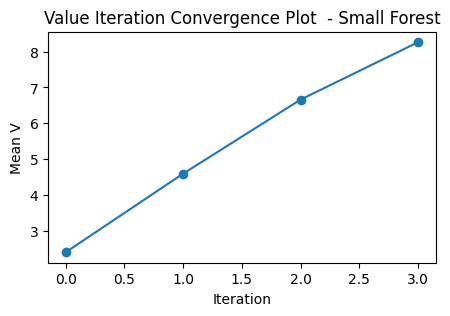

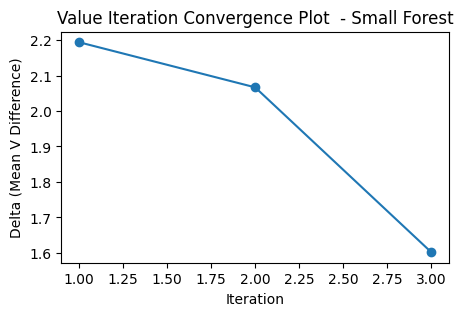

[(1, array([0, 1, 1, 1, 0])),
 (2, array([0, 1, 1, 0, 0])),
 (3, array([0, 1, 0, 0, 0])),
 (4, array([0, 0, 0, 0, 0]))]

In [5]:
vi_forest_small = ValueIteration(P_forest_small, R_forest_small, **best_params_forest_small)
t_start = time.time()
history_forest_small = vi_forest_small.run()
t_vi_forest_small = time.time() - t_start
convergence_plot('Value Iteration', 'Small Forest', history=history_forest_small)
vi_forest_small.p_cumulative

### reward

In [6]:
eval_policy_forest(P_forest_small, R_forest_small, vi_forest_small.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False)

5.202

### visualization

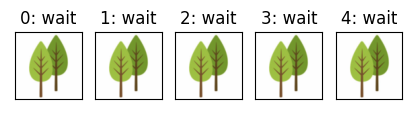

In [7]:
policy = vi_forest_small.p_cumulative[-1][1]
visualize_forest(policy)

## large

### tune hyper

best params are {'epsilon': 0.1, 'gamma': 0.99, 'max_iter': 100}


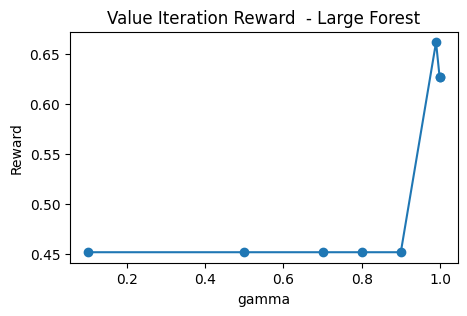

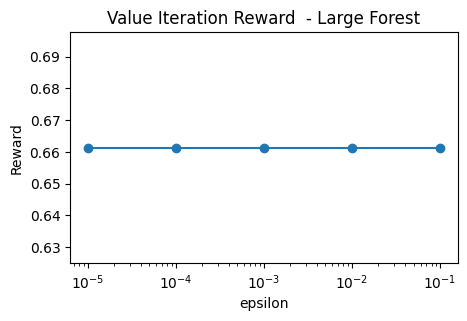

CPU times: user 17.8 s, sys: 164 ms, total: 18 s
Wall time: 19.8 s


In [8]:
%%time
param_grid = {
    'gamma': [0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999],
    'epsilon': [1e-5, 1e-4, 0.001, 0.01, 0.1],
    'max_iter': [100]
}
problem = 'forest'
best_params_forest_large, result_forest_large = tune_hyper(param_grid, ValueIteration, P_forest_large, R_forest_large, problem=problem, 
                         episode=1000, max_step=40, verbose=False)
print(f'best params are {best_params_forest_large}')
model_type = 'Value Iteration'
data_name = 'Large Forest'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_forest_large, result=result_forest_large, 
                 model_type=model_type, data_name=data_name)
hyper = 'epsilon'
plot_hyper_curve(hyper, params=best_params_forest_large, result=result_forest_large, 
                 model_type=model_type, data_name=data_name, log_x=True)

In [9]:
result_forest_large[result_forest_large['gamma']==0.99]

,epsilon,gamma,max_iter,reward,policy,iteration
5,0.00001,0.99,100,0.661375,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",102
13,0.00010,0.99,100,0.661375,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",88
21,0.00100,0.99,100,0.661375,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",75
29,0.01000,0.99,100,0.661375,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",62
37,0.10000,0.99,100,0.661375,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",48


### convergence plot

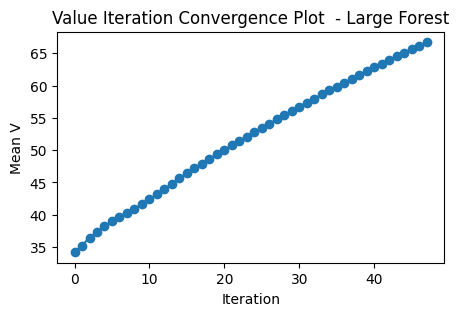

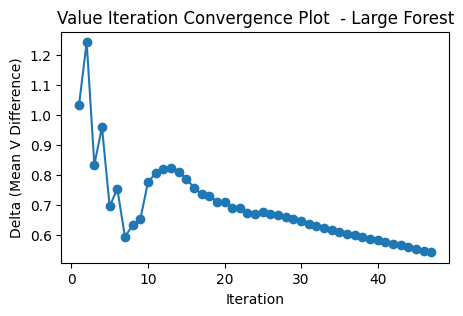

[(1, array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])),
 (2, array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (3, array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])),
 (4, array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (5, array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])),
 (6, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (7, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])),
 (8, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (10, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))]

In [10]:
vi_forest_large = ValueIteration(P_forest_large, R_forest_large, **best_params_forest_large)
t_start = time.time()
history_forest_large = vi_forest_large.run()
t_vi_forest_large = time.time() - t_start
convergence_plot('Value Iteration', 'Large Forest', history=history_forest_large)
vi_forest_large.p_cumulative

### reward

In [11]:
eval_policy_forest(P_forest_large, R_forest_large, vi_forest_large.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False)

0.661375

### visualization

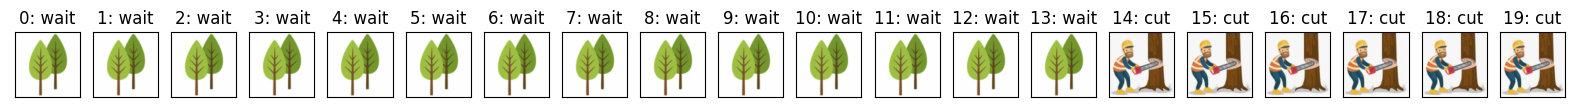

In [12]:
policy = vi_forest_large.p_cumulative[-1][1]
visualize_forest(policy)

## comparison

In [13]:
with open('./vi_forest_result.p', 'wb') as f:
    pickle.dump((vi_forest_small.iter, vi_forest_large.iter, t_vi_forest_small, t_vi_forest_large),
               f)
with open('./policy_vi_forest_small.p', 'wb') as f:
    pickle.dump(vi_forest_small.policy, f)
with open('./policy_vi_forest_large.p', 'wb') as f:
    pickle.dump(vi_forest_large.policy, f)

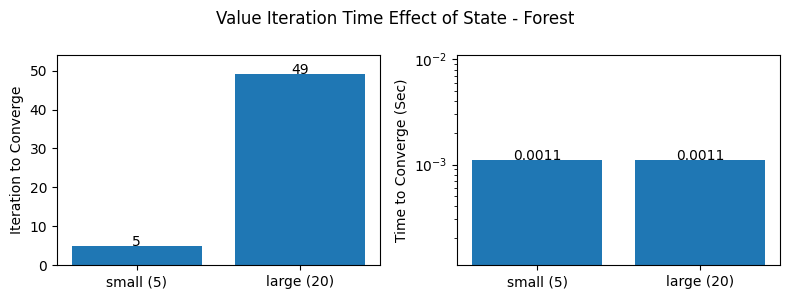

In [14]:
time_effect_plot(vi_forest_small, vi_forest_large, t_vi_forest_small, t_vi_forest_large, 'Forest', 'Value Iteration')

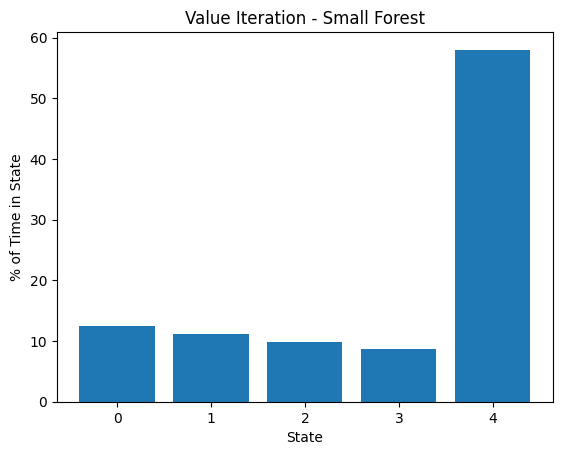

5.202

In [15]:
eval_policy_forest(P_forest_small, R_forest_small, vi_forest_small.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False, 
                   plot_state_cnt=True, model='Value Iteration', problem='Small Forest')

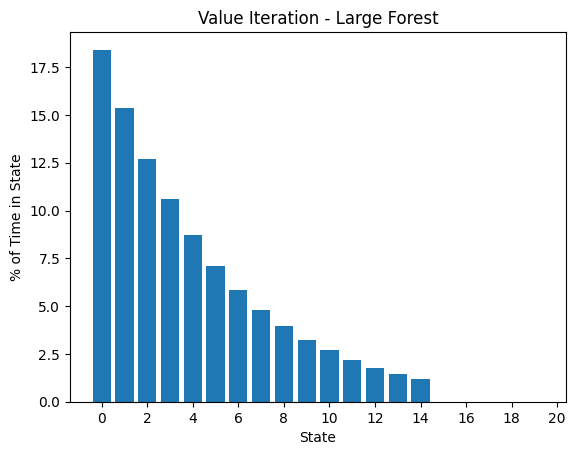

0.661375

In [16]:
eval_policy_forest(P_forest_large, R_forest_large, vi_forest_large.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False, 
                   plot_state_cnt=True, model='Value Iteration', problem='Large Forest',
                   xticks=range(0,21,2))

# lake

## small

### tune hyper

policy is (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
policy is (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0)
policy is (0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
policy is (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
policy is (0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)
policy is (1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 

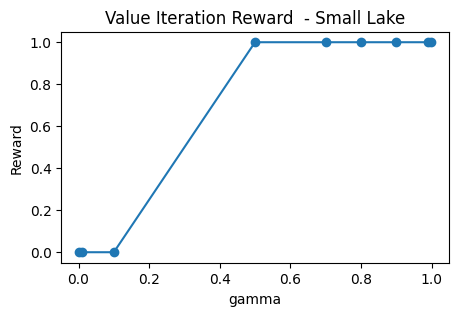

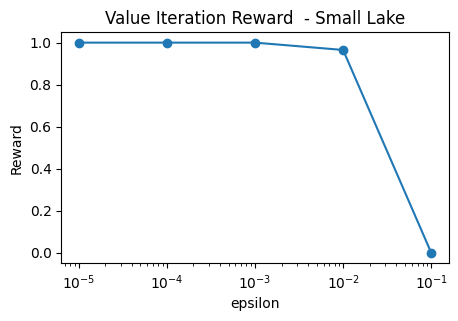

CPU times: user 26.2 s, sys: 284 ms, total: 26.5 s
Wall time: 32.6 s


In [17]:
%%time
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999],
    'epsilon': [1e-5, 1e-4, 0.001, 0.01, 0.1],
    'max_iter': [100]
}
problem = 'lake'
best_params_lake_small, result_lake_small = tune_hyper(param_grid, ValueIteration, P_lake_small, R_lake_small, env=lake_small, problem=problem, 
                         episode=1000, max_step=200, verbose=True)
print(f'best params are {best_params_lake_small}')
model_type = 'Value Iteration'
data_name = 'Small Lake'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_lake_small, result=result_lake_small, model_type=model_type, data_name=data_name)
hyper = 'epsilon'
plot_hyper_curve(hyper, params=best_params_lake_small, result=result_lake_small, 
                 model_type=model_type, data_name=data_name, log_x=True)

In [18]:
result_lake_small[result_lake_small['gamma']==0.5]

,epsilon,gamma,max_iter,reward,policy,iteration
3,0.00001,0.5,100,1.000,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",13
12,0.00010,0.5,100,1.000,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",10
21,0.00100,0.5,100,1.000,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",7
30,0.01000,0.5,100,0.965,"(0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0, 0)",4
39,0.10000,0.5,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0)",2


### convergence plot

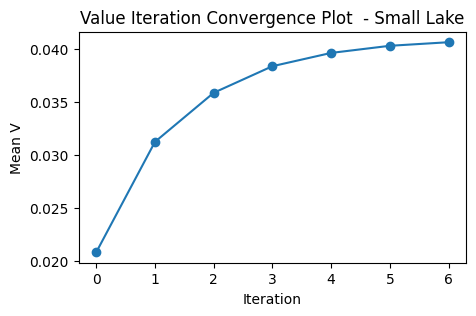

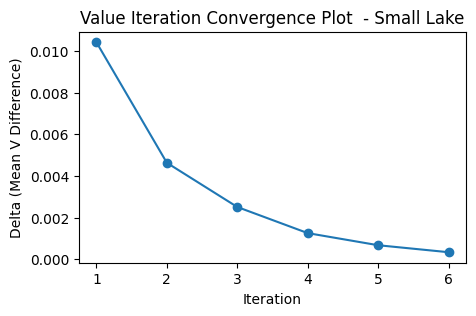

[(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 (2, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])),
 (3, array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])),
 (4, array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0, 0])),
 (5, array([0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 3, 2, 2, 0, 0, 0])),
 (6, array([1, 2, 0, 0, 1, 2, 1, 1, 3, 2, 3, 2, 2, 0, 0, 0])),
 (7, array([1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0]))]

In [19]:
vi_lake_small = ValueIteration(P_lake_small, R_lake_small, **best_params_lake_small)
t_start = time.time()
history_lake_small = vi_lake_small.run()
t_vi_lake_small = time.time() - t_start
convergence_plot('Value Iteration', 'Small Lake', history=history_lake_small)
vi_lake_small.p_cumulative

### reward

In [20]:
eval_policy_lake(lake_small, vi_lake_small.policy, episode=1000, max_step=200, verbose=False)

1.0

### visualization

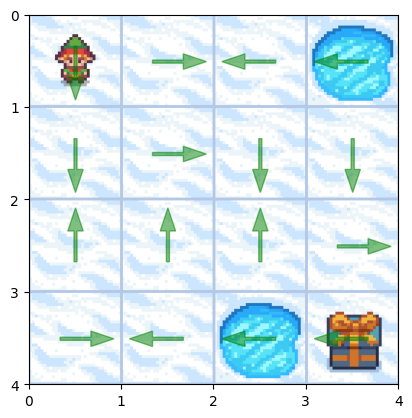

In [21]:
policy = vi_lake_small.policy
visualize_lake(policy, P_lake_small, lake_small)

## large

### tune hyper

best params are {'epsilon': 0.1, 'gamma': 0.999, 'max_iter': 100}


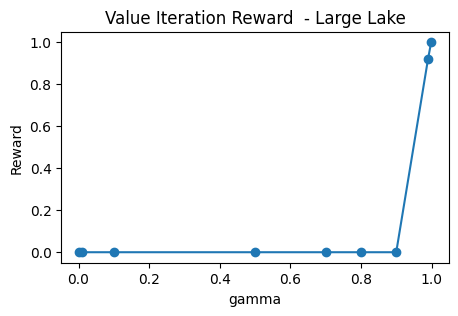

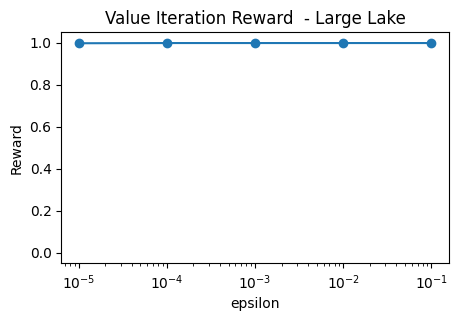

CPU times: user 10min 32s, sys: 1min 2s, total: 11min 35s
Wall time: 3min 19s


In [22]:
%%time
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999],
    'epsilon': [1e-5, 1e-4, 0.001, 0.01, 0.1],
    'max_iter': [100]
}
problem = 'lake'
best_params_lake_large, result_lake_large = tune_hyper(param_grid, ValueIteration, P_lake_large, R_lake_large, env=lake_large, problem=problem, 
                         episode=1000, max_step=1000, verbose=False)
print(f'best params are {best_params_lake_large}')
model_type = 'Value Iteration'
data_name = 'Large Lake'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_lake_large, result=result_lake_large, model_type=model_type, data_name=data_name)
hyper = 'epsilon'
plot_hyper_curve(hyper, params=best_params_lake_large, result=result_lake_large, 
                 model_type=model_type, data_name=data_name, log_x=True, ylim=(-0.05,1.05))

In [23]:
result_lake_large

,epsilon,gamma,max_iter,reward,policy,iteration
0,0.00001,0.001,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,0.00001,0.010,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,0.00001,0.100,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,0.00001,0.500,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",14
4,0.00001,0.700,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",26
5,0.00001,0.800,100,0.543,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",41
6,0.00001,0.900,100,0.563,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 3, 0, 0, 2, ...",89
7,0.00001,0.990,100,0.976,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 3, 0, 0, 2, ...",485
8,0.00001,0.999,100,0.997,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 3, 0, 0, 2, ...",836
9,0.00010,0.001,100,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


### convergence plot

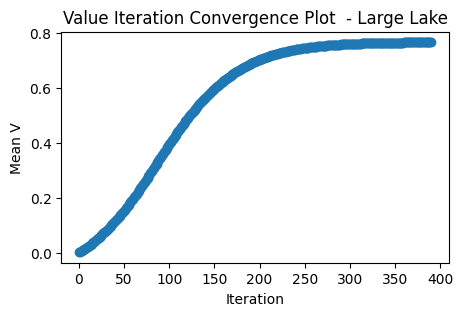

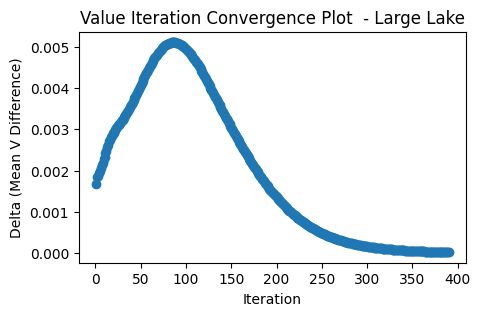

[(1,
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0,

In [24]:
vi_lake_large = ValueIteration(P_lake_large, R_lake_large, **best_params_lake_large)
t_start = time.time()
history_lake_large = vi_lake_large.run()
t_vi_lake_large = time.time() - t_start
convergence_plot('Value Iteration', 'Large Lake', history=history_lake_large)
vi_lake_large.p_cumulative

### reward

In [25]:
eval_policy_lake(lake_large, vi_lake_large.policy, episode=1000, max_step=1000, verbose=False)

0.998

### visualization

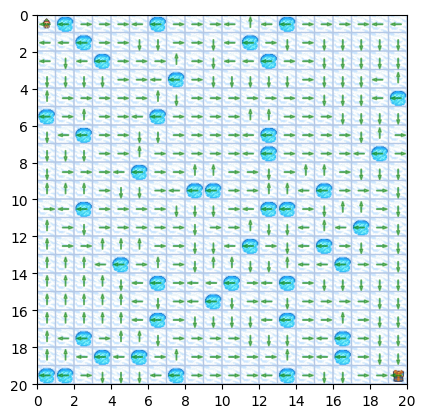

In [26]:
visualize_lake(vi_lake_large.policy, P_lake_large, lake_large)

## comparison

In [27]:
with open('./vi_lake_result.p', 'wb') as f:
    pickle.dump((vi_lake_small.iter, vi_lake_large.iter, t_vi_lake_small, t_vi_lake_large),
               f)
with open('./policy_vi_lake_small.p', 'wb') as f:
    pickle.dump(vi_lake_small.policy, f)
with open('./policy_vi_lake_large.p', 'wb') as f:
    pickle.dump(vi_lake_large.policy, f)

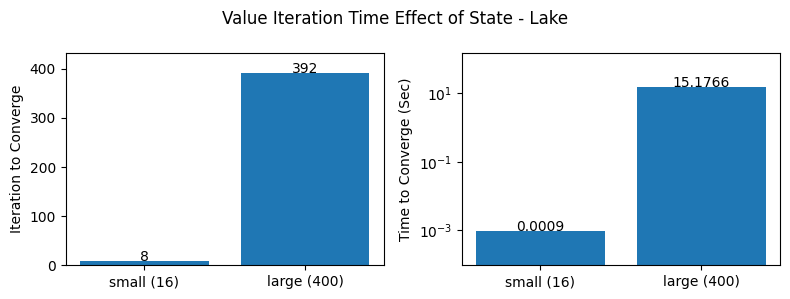

In [28]:
time_effect_plot(vi_lake_small, vi_lake_large, t_vi_lake_small, t_vi_lake_large,
                 'Lake', 'Value Iteration')